<a href="https://colab.research.google.com/github/rileyseefeldt/MAT-422/blob/main/HW3_5%2C3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW 3.5, 3.6

##3.5. K-means


Aims to group an cluster of elements into "k" clusters in which each element belongs to the cluster with the nearest mean

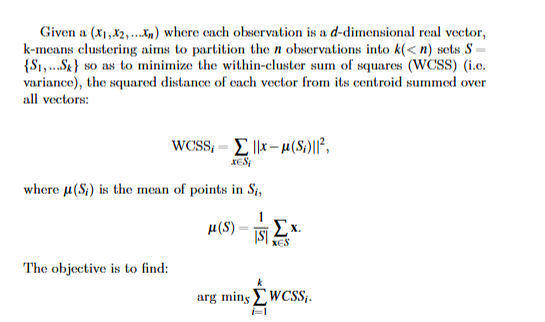

K-means Clustering Algorithm:
1. Cluster data into k groups where k is predefined
2. Select k points as random cluster centers
3. Assign objects to their closest cluster center according to the Euclidean distance function
4. Calculate mean of each cluster
5. Repeat 2,3,4 until the same points are assigned to each cluster in consecutive rounds

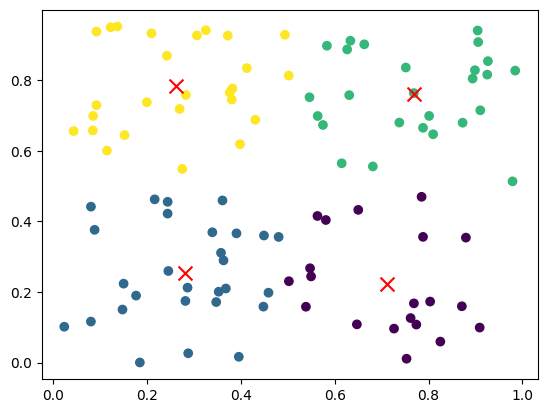

In [50]:
#K Means Example
import numpy as np
import matplotlib.pyplot as plt

#Creating array of random data
data = np.random.rand(100,2)

#Step 1: predefine k
k = 4

#Step 2: Select k points as random cluster centers
def initialize_clusterCenters(data,k):
  centers = np.random.choice(data.shape[0],k,replace =False)
  return data[centers]
  #chooses a random number from data and initializes the clusterCenter to that value (k values)
  #Algorythm cannot choose the same index more than once

#Step 3: Assign obkects to their closest cluster center according to the Euclidean distance function
def assignClusters(data, centers):
  clusters = [];
  for i in data:
    #computes distance between data and all cluster centers
    EigenDist = np.linalg.norm(i-centers, axis = 1)
    #finds index of smallest distance in EigenDist array
    choice = np.argmin(EigenDist)
    #Adds index of smalest distacne to cluster array
    clusters.append(choice)
  #returns array of all points depending on which cluster they belong to
  #converts to numpy array for consistency
  return np.array(clusters)

#Step 4: Calculate mean of each cluster
def calc_clusterCenters(data, clusters, k):
  centers = []
  for i in range(k):
    #selects all data assigned to cluster i
    points = data[clusters == i]
    #calulates mean (centroid) of data belonging to cluster
    mean = points.mean(axis=0)
    #adds centroid to center array
    centers.append(mean)
  #converts to numpy array for consistency
  return np.array(centers)

#Step 5 Repeat 2,3,4 until the same points are assigned to each cluster in consecutive rounds
def kmean(data,k, iterations):
  #calculates centroids according to Step 2
  centers = initialize_clusterCenters(data,k)

  #loops for max iterations to prevent infinite loop
  for _ in range(iterations):
    #Assigns each point to a cluster by Step 3
    clusters = assignClusters(data,centers)
    #Updates the centroids by Step 4
    centers_update = calc_clusterCenters(data,clusters,k)
    #calculates the difference between old and new centroids
    distance = np.all(np.abs(centers-centers_update))
    #loop breaks if same points are assigned to each cluster in consecutive rounds
    if(distance < 0.0001):
      break
    #updates centroids
    centers = centers_update
  return centers,clusters

centroids, clusters = kmean(data, k,1000)
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100)
plt.show()


##3.6 Support Vector Machine

Suport Vector machines are suprevised learning models which analyze data for classificaiton and regression analysis. Given a dataset, a Support Vector Machine algorythm can build amodel which assigns new data to a certain category. The goal of SVM is to find the hypoerplane that maximizes the differences between each category

Key terms:

Hyperplane: A line (in 2D space) which separates classes in feature space.

Support Vectors: Data points closest to the hyperplane, which determine the position of the hyperplane. The distance from a point to a hypoerplane is how confidence the model is about the classification

Bias: Bias term shifts the hyperplane up or down depending on the data

Weights: Coefficents that determine the importance of each feature. For example, in 2D space there are two weights, one for x and one for y.

Classification Rule in 2D space: Evaluates f(x) to determine the class it belongs in. he equation for this rule is:

f(x) = (w * x) +b

Generally, if f(x) > 0, then x is a member of "Class 1." If f(x) < 0, the x is a member of "Class -1". T


Hyperplane equation in 2D space:

y = -((w[0] / w[1]) * x) - (b / w[1])

SVM algorythm (in 2D space):
1. Find the hyperplane tha maximizes the margin between classes
2. Maximizes the distance between hyperplane and support vectors
3. Loops through datapoints to see if they are correctly classified
4. Adds new point to data
5. Checks which side of the hyperplane the data falls under

Predicted Class 2


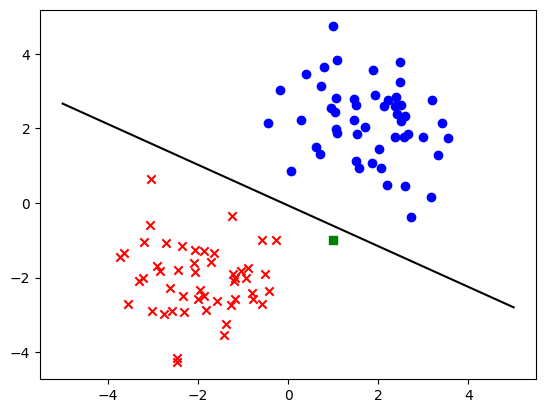

In [51]:
from re import X
#SVM example for 2D dataset

#creates two classes of data centered around the point 2,2 and -2,-2 respectively
data1 = np.random.randn(50,2) + np.array([2,2])
data2 = np.random.randn(50,2) + np.array([-2,-2])
#combines both classes into one dataset
data = np.vstack((data1,data2))
#labels first fifty elements with 1 and second fifty elements with -1
#cooresponds to the class each belong in
label = np.hstack((np.ones(50),-np.ones(50)))
#initializes weights for data1 and data2 as random 2D vector

#Step 1. Initialize parameters for original hyperplane

weights = np.random.randn(2)
#initializes bias to zero, which means boundry line passes through origin
bias = 0
#controls how much weights and biases are updated each iteration
learning_rate = 0.001
#setting amount of iterations for algoryhm
iterations = 1000
#loops over dataset depending on iteration number

#Step 2:Maximizes the distance between hyperplane and support vectors

for i in range(iterations):
  #loops over every element in the dataset
  for j in range(len(data)):
    #Step 3: checks if datapoint is correctly classified
    #Uses classification rule for calculation
    #if less than one, then the point is on the wrong side of the boundary
    if(label[j] * (np.dot(data[j],weights) +bias) < 1):
      #updates weights to push it towards the correct side of boundary
      weights += learning_rate * (data[j]*label[j] + -2 * (1/iterations)*weights)
      #updates bias to shift boundary closer to the misclassified point
      bias += learning_rate * label[j]
    #if point is correctly classified
    else:
      #Only updates weight to prevent them from growing too large
      weights += learning_rate * (-2 * (1/iterations)*weights)

#plots datapoints
#blue os belong to class 1 while red xs belong to class 2
plt.scatter(data1[:, 0], data1[:, 1], color='blue', marker='o')
plt.scatter(data2[:, 0], data2[:, 1], color='red', marker='x')

#creates 100 x values between -5 and 5
x = np.linspace(-5, 5, 100)
#calcyaltes y values for decision boundary line by the hyperplane equation
y = -(weights[0] / weights[1]) * x - bias / weights[1]
plt.plot(x, y, 'k-')

#Step 4: Add new point to data
new_point = np.array([1, -1])
plt.scatter(new_point[0], new_point[1], color='g', marker='s')

#Step 5: calculates side the new point is "mostly likely" on
#Uses classification rule for calculation
prediction = np.sign(np.dot(new_point, weights) + bias)
if(prediction == 1):
  print("Predicted Class 1")
else:
  print("Predicted Class 2")

plt.show()

The Black line is the decision boundary. The blue os represent Class 1 and the red xs represent Class 2. The green square is the new point which the algorythm is "guessing" which class it belongs to.